In [66]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import scipy.stats as stat
import statsmodels.api as sm

In [59]:
data_backup=pd.read_csv("C:\\Users\\debde\\Dropbox\\My PC (LAPTOP-CKVFQROM)\\Downloads\\Compressed\\auto-insurance-fall-2017\\train_auto.csv")
test_data=pd.read_csv("C:\\Users\\debde\\Dropbox\\My PC (LAPTOP-CKVFQROM)\\Downloads\\Compressed\\auto-insurance-fall-2017\\test_auto.csv")
y_actual=pd.read_csv("C:\\Users\\debde\\Dropbox\\My PC (LAPTOP-CKVFQROM)\\Downloads\\Compressed\\auto-insurance-fall-2017\\SHELL_AUTO.csv")
data=data_backup.copy()
data.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,PhD,Doctor,36,Private,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDEX        8161 non-null   int64  
 1   TARGET_FLAG  8161 non-null   int64  
 2   TARGET_AMT   8161 non-null   float64
 3   KIDSDRIV     8161 non-null   int64  
 4   AGE          8155 non-null   float64
 5   HOMEKIDS     8161 non-null   int64  
 6   YOJ          7707 non-null   float64
 7   INCOME       7716 non-null   object 
 8   PARENT1      8161 non-null   object 
 9   HOME_VAL     7697 non-null   object 
 10  MSTATUS      8161 non-null   object 
 11  SEX          8161 non-null   object 
 12  EDUCATION    8161 non-null   object 
 13  JOB          7635 non-null   object 
 14  TRAVTIME     8161 non-null   int64  
 15  CAR_USE      8161 non-null   object 
 16  BLUEBOOK     8161 non-null   object 
 17  TIF          8161 non-null   int64  
 18  CAR_TYPE     8161 non-null   object 
 19  RED_CA

# Pre-processing Discrete Variables

In [5]:
###Pre-processing Income
#data['INCOME']=data['INCOME'].astype(str)
data['INCOME']=data['INCOME'].str.replace('$','')
data['INCOME']=data['INCOME'].str.replace(',','')
data['INCOME']=pd.to_numeric(data['INCOME'])
###Pre-processing Home Value
#data['HOME_VAL']=data['HOME_VAL'].astype(str)
data['HOME_VAL']=data['HOME_VAL'].str.replace('$','')
data['HOME_VAL']=data['HOME_VAL'].str.replace(',','')
data['HOME_VAL']=pd.to_numeric(data['HOME_VAL'])
###Pre-processing Bluebook
#data['BLUEBOOK']=data['BLUEBOOK'].astype(str)
data['BLUEBOOK']=data['BLUEBOOK'].str.replace('$','')
data['BLUEBOOK']=data['BLUEBOOK'].str.replace(',','')
data['BLUEBOOK']=pd.to_numeric(data['BLUEBOOK'])
###Pre-processing Old Claim
#data['OLDCLAIM']=data['OLDCLAIM'].astype(str)
data['OLDCLAIM']=data['OLDCLAIM'].str.replace('$','')
data['OLDCLAIM']=data['OLDCLAIM'].str.replace(',','')
data['OLDCLAIM']=pd.to_numeric(data['OLDCLAIM'])

In [6]:
data.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,67349.0,No,0.0,z_No,M,PhD,Professional,14,Private,14230,11,Minivan,yes,4461,2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,91449.0,No,257252.0,z_No,M,z_High School,z_Blue Collar,22,Commercial,14940,1,Minivan,yes,0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,16039.0,No,124191.0,Yes,z_F,z_High School,Clerical,5,Private,4010,4,z_SUV,no,38690,2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,306251.0,Yes,M,<High School,z_Blue Collar,32,Private,15440,7,Minivan,yes,0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,114986.0,No,243925.0,Yes,z_F,PhD,Doctor,36,Private,18000,1,z_SUV,no,19217,2,Yes,3,17.0,Highly Urban/ Urban


# Handling Missing Values

In [7]:
data.isnull().sum()

INDEX            0
TARGET_FLAG      0
TARGET_AMT       0
KIDSDRIV         0
AGE              6
HOMEKIDS         0
YOJ            454
INCOME         445
PARENT1          0
HOME_VAL       464
MSTATUS          0
SEX              0
EDUCATION        0
JOB            526
TRAVTIME         0
CAR_USE          0
BLUEBOOK         0
TIF              0
CAR_TYPE         0
RED_CAR          0
OLDCLAIM         0
CLM_FREQ         0
REVOKED          0
MVR_PTS          0
CAR_AGE        510
URBANICITY       0
dtype: int64

For discrete variables, we use mode to replace missing values while for continuous variables, we use median due to its robustness.

In [8]:
data['AGE'].replace(np.NaN,data['AGE'].median(),inplace=True)
data['YOJ'].replace(np.NaN,data['YOJ'].median(),inplace=True)
data['INCOME'].replace(np.NaN,data['INCOME'].median(),inplace=True)
data['HOME_VAL'].replace(np.NaN,data['HOME_VAL'].median(),inplace=True)
data['JOB'].replace(np.NaN,data['JOB'].mode(),inplace=True)
data['CAR_AGE'].replace(np.NaN,data['CAR_AGE'].median(),inplace=True)

# Creating Dummy Variables for the Discrete Independent Variables

In [9]:
data_dummies = [pd.get_dummies(data['PARENT1'], prefix = 'PARENT1', prefix_sep = ':'),
                pd.get_dummies(data['MSTATUS'], prefix = 'MSTATUS', prefix_sep = ':'),
                pd.get_dummies(data['SEX'], prefix = 'SEX', prefix_sep = ':'),
                pd.get_dummies(data['EDUCATION'], prefix = 'EDUCATION', prefix_sep = ':'),
                pd.get_dummies(data['JOB'], prefix = 'JOB', prefix_sep = ':'),
                pd.get_dummies(data['CAR_USE'], prefix = 'CAR_USE', prefix_sep = ':'),
                pd.get_dummies(data['CAR_TYPE'], prefix = 'CAR_TYPE', prefix_sep = ':'),
                pd.get_dummies(data['RED_CAR'], prefix = 'RED_CAR', prefix_sep = ':'),
                pd.get_dummies(data['REVOKED'], prefix = 'REVOKED', prefix_sep = ':'),
                pd.get_dummies(data['URBANICITY'], prefix = 'URBANICITY', prefix_sep = ':')]
data_dummies = pd.concat(data_dummies, axis = 1)

In [10]:
data = pd.concat([data, data_dummies], axis = 1)

# Splitting Independent & Dependent Variables

In [11]:
data_inputs_train=data.drop(columns=['INDEX', 'TARGET_FLAG','TARGET_AMT'])
data_inputs_test=data['TARGET_FLAG']

# Function to Calculate Weight of Evidence & Information Value

In [12]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [13]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

In [14]:
df_parent = woe_discrete(data_inputs_train, 'PARENT1', data_inputs_test)
df_parent

,PARENT1,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,No,7084,0.236731,0.868031,1677.0,5407.0,0.778913,0.899967,-0.144458,NaN,NaN,0.113489
1,Yes,1077,0.441968,0.131969,476.0,601.0,0.221087,0.100033,0.793053,0.205238,0.937511,0.113489


Since the IV is moderate, we keep this independent variable.

In [15]:
df_mstatus = woe_discrete(data_inputs_train, 'MSTATUS', data_inputs_test)
df_mstatus

,MSTATUS,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Yes,4894,0.215161,0.599681,1053.0,3841.0,0.489085,0.639314,-0.267860,NaN,NaN,0.09255
1,z_No,3267,0.336700,0.400319,1100.0,2167.0,0.510915,0.360686,0.348196,0.121539,0.616056,0.09255


Since the IV is moderate, we keep this independent variable.

In [16]:
df_sex = woe_discrete(data_inputs_train, 'SEX', data_inputs_test)
df_sex

,SEX,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,M,3786,0.253830,0.463914,961.0,2825.0,0.446354,0.470206,-0.052060,NaN,NaN,0.002292
1,z_F,4375,0.272457,0.536086,1192.0,3183.0,0.553646,0.529794,0.044038,0.018627,0.096098,0.002292


It is seen that Information Value for the predictor SEX is very low. Hence, we ignore this predictor.

,EDUCATION,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,PhD,728,0.171703,0.089205,125.0,603.0,0.058059,0.100366,-0.547374,NaN,NaN,0.109158
1,Masters,1658,0.197226,0.203161,327.0,1331.0,0.151881,0.221538,-0.377496,0.025522,0.169878,0.109158
2,Bachelors,2242,0.233274,0.274721,523.0,1719.0,0.242917,0.286119,-0.163687,0.036048,0.213809,0.109158
3,<High School,1203,0.320033,0.147408,385.0,818.0,0.178820,0.136152,0.272611,0.086759,0.436298,0.109158
4,z_High School,2330,0.340343,0.285504,793.0,1537.0,0.368323,0.255826,0.364465,0.020310,0.091854,0.109158


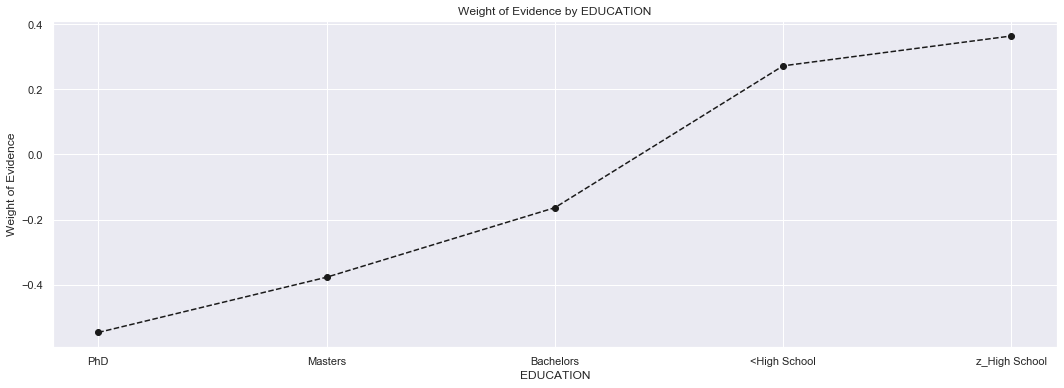

In [17]:
df_education = woe_discrete(data_inputs_train, 'EDUCATION', data_inputs_test)
plot_by_woe(df_education)
df_education

Since the IV is moderate, we keep this independent variable.

,JOB,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Doctor,246,0.117886,0.032220,29.0,217.0,0.014378,0.038626,-0.988237,NaN,NaN,0.190828
1,Manager,988,0.138664,0.129404,137.0,851.0,0.067923,0.151477,-0.802067,0.020778,0.186170,0.190828
2,Lawyer,835,0.183234,0.109365,153.0,682.0,0.075855,0.121396,-0.470227,0.044570,0.331839,0.190828
3,Professional,1117,0.221128,0.146300,247.0,870.0,0.122459,0.154859,-0.234740,0.037894,0.235487,0.190828
4,Home Maker,641,0.280811,0.083955,180.0,461.0,0.089241,0.082058,0.083923,0.059683,0.318664,0.190828
5,Clerical,1271,0.291896,0.166470,371.0,900.0,0.183937,0.160199,0.138172,0.011085,0.054248,0.190828
6,z_Blue Collar,1825,0.347397,0.239031,634.0,1191.0,0.314328,0.211997,0.393865,0.055501,0.255693,0.190828
7,Student,712,0.373596,0.093255,266.0,446.0,0.131879,0.079388,0.507542,0.026198,0.113677,0.190828


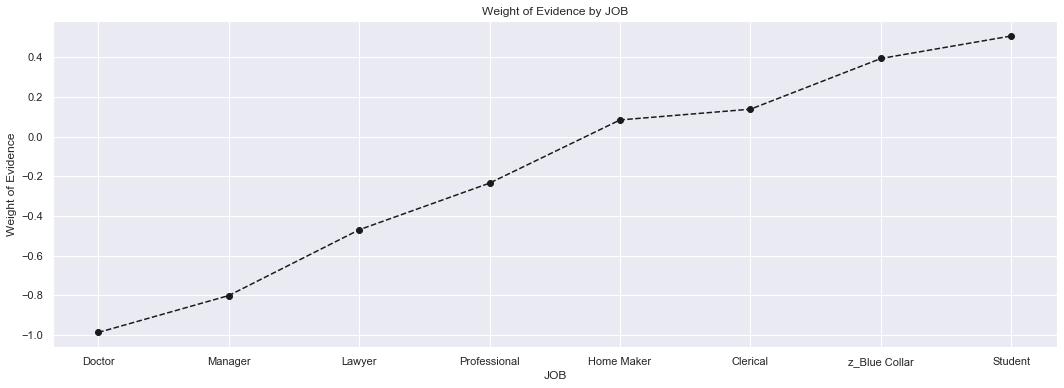

In [18]:
df_job = woe_discrete(data_inputs_train, 'JOB', data_inputs_test)
plot_by_woe(df_job)
df_job

IV for this variable is moderately high. Since the number of observations with category Doctor are very less, we merge them with the category Manager. Also, we merge the categories Home Maker & Clerical as they have similar WoE.

In [19]:
data_inputs_train['JOB:Doctor+Manager']=sum([data_inputs_train['JOB:Doctor']+data_inputs_train['JOB:Manager']])
data_inputs_train['JOB:Home Maker+Clerical']=sum([data_inputs_train['JOB:Home Maker']+data_inputs_train['JOB:Clerical']])

In [20]:
data_inputs_train.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,PARENT1:No,PARENT1:Yes,MSTATUS:Yes,MSTATUS:z_No,SEX:M,SEX:z_F,EDUCATION:<High School,EDUCATION:Bachelors,EDUCATION:Masters,EDUCATION:PhD,EDUCATION:z_High School,JOB:Clerical,JOB:Doctor,JOB:Home Maker,JOB:Lawyer,JOB:Manager,JOB:Professional,JOB:Student,JOB:z_Blue Collar,CAR_USE:Commercial,CAR_USE:Private,CAR_TYPE:Minivan,CAR_TYPE:Panel Truck,CAR_TYPE:Pickup,CAR_TYPE:Sports Car,CAR_TYPE:Van,CAR_TYPE:z_SUV,RED_CAR:no,RED_CAR:yes,REVOKED:No,REVOKED:Yes,URBANICITY:Highly Urban/ Urban,URBANICITY:z_Highly Rural/ Rural,JOB:Doctor+Manager,JOB:Home Maker+Clerical
0,0,60.0,0,11.0,67349.0,No,0.0,z_No,M,PhD,Professional,14,Private,14230,11,Minivan,yes,4461,2,No,3,18.0,Highly Urban/ Urban,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0
1,0,43.0,0,11.0,91449.0,No,257252.0,z_No,M,z_High School,z_Blue Collar,22,Commercial,14940,1,Minivan,yes,0,0,No,0,1.0,Highly Urban/ Urban,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0
2,0,35.0,1,10.0,16039.0,No,124191.0,Yes,z_F,z_High School,Clerical,5,Private,4010,4,z_SUV,no,38690,2,No,3,10.0,Highly Urban/ Urban,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1
3,0,51.0,0,14.0,54028.0,No,306251.0,Yes,M,<High School,z_Blue Collar,32,Private,15440,7,Minivan,yes,0,0,No,0,6.0,Highly Urban/ Urban,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0
4,0,50.0,0,11.0,114986.0,No,243925.0,Yes,z_F,PhD,Doctor,36,Private,18000,1,z_SUV,no,19217,2,Yes,3,17.0,Highly Urban/ Urban,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,1,0


In [21]:
df_car = woe_discrete(data_inputs_train, 'CAR_USE', data_inputs_test)
df_car

,CAR_USE,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Private,5132,0.215511,0.628845,1106.0,4026.0,0.513702,0.670107,-0.265794,NaN,NaN,0.102265
1,Commercial,3029,0.345659,0.371155,1047.0,1982.0,0.486298,0.329893,0.388052,0.130148,0.653846,0.102265


Since the IV is moderate, we don't discard CAR_USE.

,CAR_TYPE,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Minivan,2145,0.162704,0.262835,349.0,1796.0,0.162099,0.298935,-0.612016,NaN,NaN,0.117892
1,Panel Truck,676,0.263314,0.082833,178.0,498.0,0.082675,0.082889,-0.002587,0.100610,0.609429,0.117892
2,Van,750,0.268000,0.091901,201.0,549.0,0.093358,0.091378,0.021436,0.004686,0.024023,0.117892
3,z_SUV,2294,0.295554,0.281093,678.0,1616.0,0.314909,0.268975,0.157668,0.027554,0.136232,0.117892
4,Pickup,1389,0.318934,0.170200,443.0,946.0,0.205759,0.157457,0.267557,0.023381,0.109889,0.117892
5,Sports Car,907,0.335171,0.111138,304.0,603.0,0.141198,0.100366,0.341340,0.016236,0.073783,0.117892


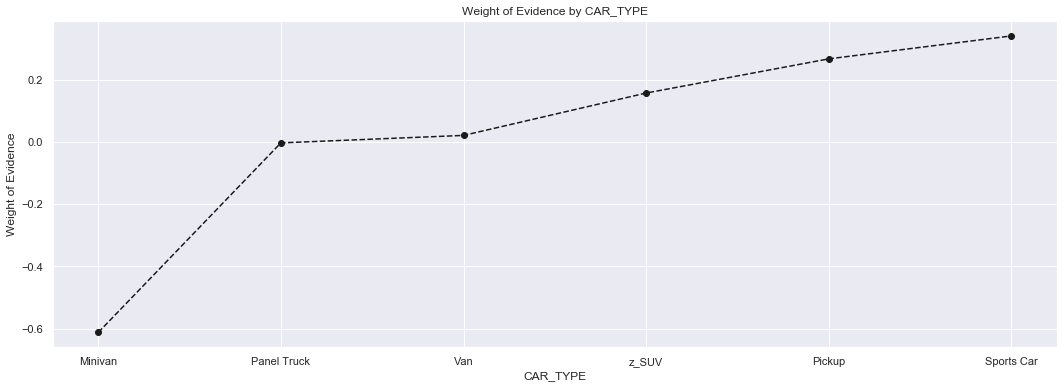

In [22]:
df_type = woe_discrete(data_inputs_train, 'CAR_TYPE', data_inputs_test)
plot_by_woe(df_type)
df_type

We merge the categories Panel Truck with Van & Pickup with Sports Car due to similar WoE.

In [23]:
data_inputs_train['CAR_TYPE:Panel Truck+Van']=sum([data_inputs_train['CAR_TYPE:Van']+data_inputs_train['CAR_TYPE:Panel Truck']])
data_inputs_train['CAR_TYPE:Pickup+Sports Car']=sum([data_inputs_train['CAR_TYPE:Pickup']+data_inputs_train['CAR_TYPE:Sports Car']])

In [24]:
df_red = woe_discrete(data_inputs_train, 'RED_CAR', data_inputs_test)
#plot_by_woe(df_red)
df_red

,RED_CAR,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,yes,2378,0.259041,0.291386,616.0,1762.0,0.286112,0.293276,-0.024728,NaN,NaN,0.000249
1,no,5783,0.265779,0.708614,1537.0,4246.0,0.713888,0.706724,0.010085,0.006738,0.034813,0.000249


The variable RED_CAR has very low Information value. Consequently, we drop this predictor.

In [25]:
df_revoked = woe_discrete(data_inputs_train, 'REVOKED', data_inputs_test)
#plot_by_woe(df_red)
df_revoked

,REVOKED,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,No,7161,0.238793,0.877466,1710.0,5451.0,0.794241,0.90729,-0.133076,NaN,NaN,0.105171
1,Yes,1000,0.443000,0.122534,443.0,557.0,0.205759,0.09271,0.797234,0.204207,0.93031,0.105171


In [26]:
df_urban = woe_discrete(data_inputs_train, 'URBANICITY', data_inputs_test)
#plot_by_woe(df_red)
df_urban

,URBANICITY,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,z_Highly Rural/ Rural,1669,0.068904,0.204509,115.0,1554.0,0.053414,0.258655,-1.577426,NaN,NaN,0.373913
1,Highly Urban/ Urban,6492,0.313925,0.795491,2038.0,4454.0,0.946586,0.741345,0.244396,0.245021,1.821822,0.373913


URBANICITY seems to be the most influencial categorical predictor with the highest Information Value.

# Selecting the Necessary Predictor Variables

In [27]:
train_x=data_inputs_train[['KIDSDRIV','AGE','YOJ','INCOME','PARENT1:No','HOME_VAL','MSTATUS:Yes','EDUCATION:z_High School',
'EDUCATION:Bachelors','EDUCATION:Masters','EDUCATION:PhD','JOB:Doctor+Manager','JOB:Home Maker+Clerical','JOB:Lawyer',
'JOB:Professional','JOB:z_Blue Collar','TRAVTIME','CAR_USE:Commercial','BLUEBOOK','TIF','CAR_TYPE:Panel Truck+Van',
'CAR_TYPE:Pickup+Sports Car','CAR_TYPE:Minivan','OLDCLAIM','CLM_FREQ','REVOKED:No','URBANICITY:Highly Urban/ Urban',
'MVR_PTS','CAR_AGE']]

In [28]:
data_inputs_train.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,PARENT1:No,PARENT1:Yes,MSTATUS:Yes,MSTATUS:z_No,SEX:M,SEX:z_F,EDUCATION:<High School,EDUCATION:Bachelors,EDUCATION:Masters,EDUCATION:PhD,EDUCATION:z_High School,JOB:Clerical,JOB:Doctor,JOB:Home Maker,JOB:Lawyer,JOB:Manager,JOB:Professional,JOB:Student,JOB:z_Blue Collar,CAR_USE:Commercial,CAR_USE:Private,CAR_TYPE:Minivan,CAR_TYPE:Panel Truck,CAR_TYPE:Pickup,CAR_TYPE:Sports Car,CAR_TYPE:Van,CAR_TYPE:z_SUV,RED_CAR:no,RED_CAR:yes,REVOKED:No,REVOKED:Yes,URBANICITY:Highly Urban/ Urban,URBANICITY:z_Highly Rural/ Rural,JOB:Doctor+Manager,JOB:Home Maker+Clerical,CAR_TYPE:Panel Truck+Van,CAR_TYPE:Pickup+Sports Car
0,0,60.0,0,11.0,67349.0,No,0.0,z_No,M,PhD,Professional,14,Private,14230,11,Minivan,yes,4461,2,No,3,18.0,Highly Urban/ Urban,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
1,0,43.0,0,11.0,91449.0,No,257252.0,z_No,M,z_High School,z_Blue Collar,22,Commercial,14940,1,Minivan,yes,0,0,No,0,1.0,Highly Urban/ Urban,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
2,0,35.0,1,10.0,16039.0,No,124191.0,Yes,z_F,z_High School,Clerical,5,Private,4010,4,z_SUV,no,38690,2,No,3,10.0,Highly Urban/ Urban,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0
3,0,51.0,0,14.0,54028.0,No,306251.0,Yes,M,<High School,z_Blue Collar,32,Private,15440,7,Minivan,yes,0,0,No,0,6.0,Highly Urban/ Urban,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
4,0,50.0,0,11.0,114986.0,No,243925.0,Yes,z_F,PhD,Doctor,36,Private,18000,1,z_SUV,no,19217,2,Yes,3,17.0,Highly Urban/ Urban,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0


# Fitting a Logistic Regression Model to the data 

In [29]:
logit_model=sm.Logit(data_inputs_test,train_x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.450020
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            TARGET_FLAG   No. Observations:                 8161
Model:                          Logit   Df Residuals:                     8132
Method:                           MLE   Df Model:                           28
Date:                Mon, 08 Mar 2021   Pseudo R-squ.:                  0.2201
Time:                        04:53:35   Log-Likelihood:                -3672.6
converged:                       True   LL-Null:                       -4709.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
KIDSDRIV                           0.3833      0.055      7.032     

We drop the columns CAR_AGE, JOB & CAR_TYPE as the p-values are not significant for these predictors.

In [30]:
train_x.drop(['JOB:Doctor+Manager', 'JOB:Home Maker+Clerical','JOB:Lawyer','JOB:Professional','JOB:z_Blue Collar',
'CAR_AGE','CAR_TYPE:Panel Truck+Van','CAR_TYPE:Pickup+Sports Car','CAR_TYPE:Minivan'], axis = 1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
logit_model=sm.Logit(data_inputs_test,train_x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.459416
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            TARGET_FLAG   No. Observations:                 8161
Model:                          Logit   Df Residuals:                     8141
Method:                           MLE   Df Model:                           19
Date:                Mon, 08 Mar 2021   Pseudo R-squ.:                  0.2038
Time:                        04:54:09   Log-Likelihood:                -3749.3
converged:                       True   LL-Null:                       -4709.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
KIDSDRIV                           0.3749      0.054      6.968     

We see that all the predictors are significant in this model. So, we procede with this model.

# Pre-processing the Test Dataset

In [32]:
#test_data=pd.read_csv("C:\\Users\\debde\\Dropbox\\My PC (LAPTOP-CKVFQROM)\\Downloads\\Compressed\\auto-insurance-fall-2017\\test_auto.csv")

In [33]:
###Pre-processing Income
#data['INCOME']=data['INCOME'].astype(str)
test_data['INCOME']=test_data['INCOME'].str.replace('$','')
test_data['INCOME']=test_data['INCOME'].str.replace(',','')
test_data['INCOME']=pd.to_numeric(test_data['INCOME'])
###Pre-processing Home Value
#data['HOME_VAL']=data['HOME_VAL'].astype(str)
test_data['HOME_VAL']=test_data['HOME_VAL'].str.replace('$','')
test_data['HOME_VAL']=test_data['HOME_VAL'].str.replace(',','')
test_data['HOME_VAL']=pd.to_numeric(test_data['HOME_VAL'])
###Pre-processing Bluebook
#data['BLUEBOOK']=data['BLUEBOOK'].astype(str)
test_data['BLUEBOOK']=test_data['BLUEBOOK'].str.replace('$','')
test_data['BLUEBOOK']=test_data['BLUEBOOK'].str.replace(',','')
test_data['BLUEBOOK']=pd.to_numeric(test_data['BLUEBOOK'])
###Pre-processing Old Claim
#data['OLDCLAIM']=data['OLDCLAIM'].astype(str)
test_data['OLDCLAIM']=test_data['OLDCLAIM'].str.replace('$','')
test_data['OLDCLAIM']=test_data['OLDCLAIM'].str.replace(',','')
test_data['OLDCLAIM']=pd.to_numeric(test_data['OLDCLAIM'])

In [34]:
test_data.isnull().sum()

INDEX             0
TARGET_FLAG    2141
TARGET_AMT     2141
KIDSDRIV          0
AGE               1
HOMEKIDS          0
YOJ              94
INCOME          125
PARENT1           0
HOME_VAL        111
MSTATUS           0
SEX               0
EDUCATION         0
JOB             139
TRAVTIME          0
CAR_USE           0
BLUEBOOK          0
TIF               0
CAR_TYPE          0
RED_CAR           0
OLDCLAIM          0
CLM_FREQ          0
REVOKED           0
MVR_PTS           0
CAR_AGE         129
URBANICITY        0
dtype: int64

In [35]:
test_data['AGE'].replace(np.NaN,test_data['AGE'].median(),inplace=True)
test_data['YOJ'].replace(np.NaN,test_data['YOJ'].median(),inplace=True)
test_data['INCOME'].replace(np.NaN,test_data['INCOME'].median(),inplace=True)
test_data['HOME_VAL'].replace(np.NaN,test_data['HOME_VAL'].median(),inplace=True)
test_data['JOB'].replace(np.NaN,test_data['JOB'].mode(),inplace=True)
test_data['CAR_AGE'].replace(np.NaN,test_data['CAR_AGE'].median(),inplace=True)

In [36]:
test_data_dummies = [pd.get_dummies(test_data['PARENT1'], prefix = 'PARENT1', prefix_sep = ':'),
                pd.get_dummies(test_data['MSTATUS'], prefix = 'MSTATUS', prefix_sep = ':'),
                #pd.get_dummies(test_data['SEX'], prefix = 'SEX', prefix_sep = ':'),
                pd.get_dummies(test_data['EDUCATION'], prefix = 'EDUCATION', prefix_sep = ':'),
                #pd.get_dummies(test_data['JOB'], prefix = 'JOB', prefix_sep = ':'),
                pd.get_dummies(test_data['CAR_USE'], prefix = 'CAR_USE', prefix_sep = ':'),
                #pd.get_dummies(test_data['CAR_TYPE'], prefix = 'CAR_TYPE', prefix_sep = ':'),
                #pd.get_dummies(test_data['RED_CAR'], prefix = 'RED_CAR', prefix_sep = ':'),
                pd.get_dummies(test_data['REVOKED'], prefix = 'REVOKED', prefix_sep = ':'),
                pd.get_dummies(test_data['URBANICITY'], prefix = 'URBANICITY', prefix_sep = ':')]
test_data_dummies = pd.concat(test_data_dummies, axis = 1)

In [37]:
test_data = pd.concat([test_data, test_data_dummies], axis = 1)
test_x=test_data.drop(columns=['INDEX', 'TARGET_FLAG','TARGET_AMT'])
test_y=test_data['TARGET_FLAG']

In [38]:
test_x=test_x[['KIDSDRIV','AGE','YOJ','INCOME','PARENT1:No','HOME_VAL','MSTATUS:Yes','EDUCATION:z_High School',
'EDUCATION:Bachelors','EDUCATION:Masters','EDUCATION:PhD','TRAVTIME','CAR_USE:Commercial','BLUEBOOK','TIF','OLDCLAIM','CLM_FREQ','REVOKED:No','URBANICITY:Highly Urban/ Urban',
'MVR_PTS']]

# Running the Model on the Test data

In [40]:
logreg = LogisticRegression()
logreg.fit(train_x, data_inputs_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_pred = logreg.predict(test_x)

# Calculating Model Accuracy

In [47]:
a = np.array(y_pred)
unique_elements, counts_elements = np.unique(a, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [2092   49]]


The accuracy on the test set in this case is 97.7%. We can improve this accuracy by considering an appropriate cut-off from the ROC curve. Since the test data consists of cases only when a claim has been made, a sufficiently high cutoff can be chosen so that all forcasts are positive..

# Linear Regression to predict the Target Amount

In [55]:
ols_train=data_inputs_train[(data_inputs_train['TARGET_FLAG'] == 1)]
ols_train_x=ols_train[['KIDSDRIV','AGE','YOJ','INCOME','PARENT1:No','HOME_VAL','MSTATUS:Yes','EDUCATION:z_High School',
'EDUCATION:Bachelors','EDUCATION:Masters','EDUCATION:PhD','TRAVTIME','CAR_USE:Commercial','BLUEBOOK','TIF','OLDCLAIM',
'CLM_FREQ','REVOKED:No','URBANICITY:Highly Urban/ Urban','MVR_PTS']]
ols_train_y=ols_train['TARGET_AMT']

In [68]:
ols_train_x=sm.add_constant(ols_train_x)
model1=sm.OLS(ols_train_y,ols_train_x).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TARGET_AMT   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.412
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           0.000440
Time:                        10:05:37   Log-Likelihood:                -22310.
No. Observations:                2153   AIC:                         4.466e+04
Df Residuals:                    2132   BIC:                         4.478e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           2833.7601   1330.437      2.130      0.033     224.670    5442.850
KIDSDRIV                         -75.1354    280.973     -0.267      0.789    -626.146     475.875
AGE                               16.5668     19.232      0.861      0.389     -21.149      54.283
YOJ                               45.5813     42.300      1.078      0.281     -37.372     128.535
INCOME                            -0.0087      0.006     -1.410      0.159      -0.021       0.003
PARENT1:No                      -504.5949    523.163     -0.965      0.335   -1530.558     521.368
HOME_VAL                           0.0024      0.002      1.240      0.215      -0.001       0.006
MSTATUS:Yes                     -658.6032    460.771     -1.429      0.153   -1562.211     245.005
EDUCATION:z_High School         -487.8826    493.975     -0.988      0.323   -1456.606     480.840
EDUCATION:Bachelors             -132.0117    547.981     -0.241      0.810   -1206.646     942.622
EDUCATION:Masters                -91.3697    648.656     -0.141      0.888   -1363.435    1180.695
EDUCATION:PhD                    443.4730    951.376      0.466      0.641   -1422.249    2309.195
TRAVTIME                           1.7299     11.039      0.157      0.875     -19.919      23.379
CAR_USE:Commercial               573.1209    367.509      1.559      0.119    -147.592    1293.834
BLUEBOOK                           0.1020      0.023      4.473      0.000       0.057       0.147
TIF                              -12.9645     42.388     -0.306      0.760     -96.090      70.161
OLDCLAIM                           0.0212      0.023      0.941      0.347      -0.023       0.065
CLM_FREQ                        -129.9315    157.123     -0.827      0.408    -438.061     178.198
REVOKED:No                      1015.6344    514.267      1.975      0.048       7.116    2024.152
URBANICITY:Highly Urban/ Urban   -39.3925    749.679     -0.053      0.958   -1509.570    1430.786
MVR_PTS                          124.2669     68.082      1.825      0.068      -9.247     257.781
==============================================================================
Omnibus:                     2346.026   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           166108.503
Skew:                           5.503   Prob(JB):                         0.00
Kurtosis:                      44.600   Cond. No.                     1.50e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+06. This might indicate that there are
strong multicollinearity or other numerical problem

The fit seems to be very poor as the correlation is the value of adjusted r-square is 1.3%. Almost none of the predictors seem to be significant.

# Coorelation Matrix & Multicollinearity

In [74]:
#a4_dims = (15, 8)
#fig, ax = pyplot.subplots(figsize=a4_dims)
corrMatrix = ols_train_x.corr()
#sns.heatmap(corrMatrix, annot=True)
print(corrMatrix)

                                const  KIDSDRIV       AGE       YOJ    INCOME  \
const                             NaN       NaN       NaN       NaN       NaN   
KIDSDRIV                          NaN  1.000000  0.000032  0.065926  0.053249   
AGE                               NaN  0.000032  1.000000  0.123610  0.174587   
YOJ                               NaN  0.065926  0.123610  1.000000  0.354554   
INCOME                            NaN  0.053249  0.174587  0.354554  1.000000   
PARENT1:No                        NaN -0.223946  0.329656  0.051215  0.040453   
HOME_VAL                          NaN  0.043689  0.207841  0.309688  0.459360   
MSTATUS:Yes                       NaN  0.043881  0.111156  0.131804 -0.056751   
EDUCATION:z_High School           NaN -0.052068 -0.102626 -0.047380 -0.259258   
EDUCATION:Bachelors               NaN -0.006550 -0.026714 -0.017565  0.082715   
EDUCATION:Masters                 NaN  0.058014  0.164104  0.090621  0.284729   
EDUCATION:PhD               

From the above correlation table, apparently there is no multicollinearity among the data. Hence, we cam conclude that linear regression is not a good for this model. Advanced techniques like boosting or bagging will probably help to improve the accuracy.